## カラーバーのカスタマイズ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
seaborn.set()

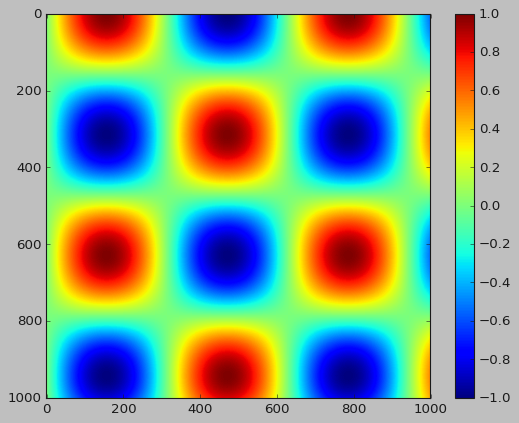

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.style.use('classic')
plt.imshow(I)
plt.colorbar()

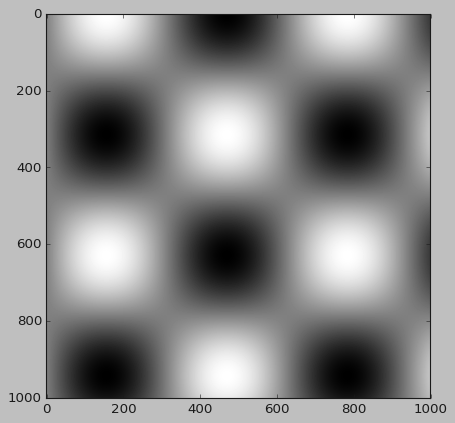

In [4]:
plt.imshow(I, cmap='gray')

In [5]:
from matplotlib.colors import LinearSegmentedColormap

In [15]:
def grayscale_cmap(cmap):
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [16]:
def view_colormap(cmap):
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

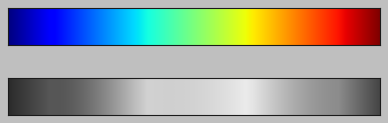

In [17]:
view_colormap('jet')

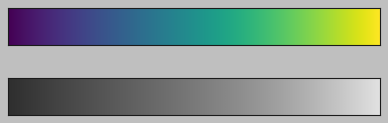

In [18]:
view_colormap('viridis')

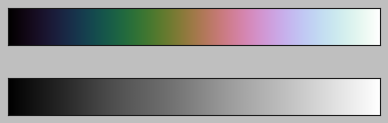

In [19]:
view_colormap('cubehelix')

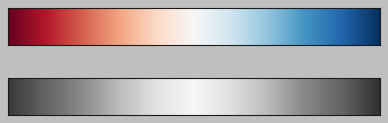

In [23]:
view_colormap('RdBu')